In [11]:
import numpy as np
import pandas as pd
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt
import morphops as mops

In [3]:

# Create 3 landmark sets, each having 5 landmarks in 2 dimensions.
A = [[0,0],[2,0],[2,2],[1,3],[0,2]]
B = [[0.1,-0.1],[2,0],[2.3,1.8],[1,3],[0.4,2]]
C = [[-0.1,-0.1],[2.1,0],[2,1.8],[0.9,3.1],[-0.4,2.1]]

# Perform Generalized Procrustes alignment to align A, B, C.
res = mops.gpa([A, B, C])
# res['aligned'] contains the aligned A, B, C. res['mean'] is their mean.

# Create a Thin-plate Spline warp from A to B and warp C.
warped_C = mops.tps_warp(A, B, C)
# warped_C contains the image of the pts in C under the TPS warp.


ssq diff 6.938893903907228e-18


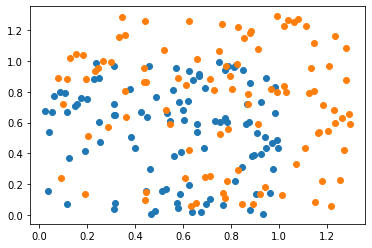

In [2]:
rnd = np.random.random(2)
x = np.random.random((100,2))
y = x * (rnd[0] + 1) + rnd[1]
plt.scatter(x[:,0],x[:,1])
plt.scatter(y[:,0],y[:,1])

In [5]:
np.random.seed(1)
idx = np.random.choice(100,replace = False,size=15)
warped = Rbf(y[idx,:],x[idx,:],function="thin_plate")

In [6]:
new_y = warped(y)

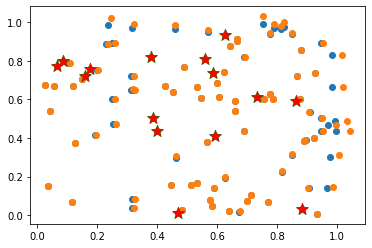

In [7]:
plt.scatter(x[:,0],x[:,1])
plt.scatter(new_y[:,0],new_y[:,1])

plt.scatter(x[idx,0],x[idx,1],marker ="*",s = 150,c = "green")
plt.scatter(new_y[idx,0],new_y[idx,1],marker ="*",s = 100,c = "red")

In [14]:
new_y = mops.tps_warp(y[idx,:],x[idx,:],y)

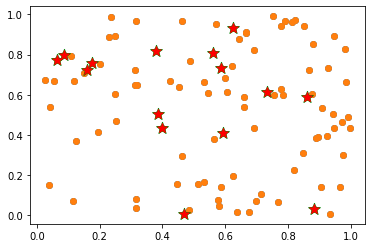

In [15]:
plt.scatter(x[:,0],x[:,1])
plt.scatter(new_y[:,0],new_y[:,1])

plt.scatter(x[idx,0],x[idx,1],marker ="*",s = 150,c = "green")
plt.scatter(new_y[idx,0],new_y[idx,1],marker ="*",s = 100,c = "red")